In [32]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.cross_validation import LeaveOneOut, KFold

In [25]:
df = pd.read_csv("data/combined.csv")

In [30]:
# this is ground truth values
truth = df["murder_rate"].values

In [26]:
"""
Run random forest regression.
"""
def predict_rand_forest(x_col_names, df):        
    model = RandomForestRegressor()
    n_features = len(x_col_names)
    x_train = df[x_col_names].values.reshape(-1, n_features)
    y_train = df["murder_rate"].values.reshape(-1, 1)    
    model.fit(x_train, y_train)    
    return model.predict(x_train)

In [45]:
"""
Run kfold cross-validation of random forest regression.
"""
def predict_kfold_rand_forest(x_col_names, df, n_folds=10):    
    model = RandomForestRegressor()
    n_features = len(x_col_names)
    kf = KFold(len(df), n_folds)
    predicted = []
    for train, test in kf:
        x_train = df.iloc[train][x_col_names].values.reshape(-1, n_features)
        y_train = df.iloc[train]["murder_rate"].values.reshape(-1, 1)
        model.fit(x_train, y_train)    
        x_test = df.iloc[test][x_col_names].values.reshape(-1, n_features)
        predicted.extend(model.predict(x_test))
    return predicted

In [42]:
"""
Run LOO cross-validation of random forest regression.
"""
def predict_loo_rand_forest(x_col_names, df):
    model = RandomForestRegressor()
    n_features = len(x_col_names)
    loo = LeaveOneOut(len(df))
    predicted = []
    for train, test in loo:
        x_train = df.iloc[train][x_col_names].values.reshape(-1, n_features)
        y_train = df.iloc[train]["murder_rate"].values.reshape(-1, 1)
        model.fit(x_train, y_train)    
        x_test = df.iloc[test][x_col_names].values.reshape(-1, n_features)
        predicted.extend(model.predict(x_test))
    return predicted

In [38]:
predicted = predict_rand_forest(["no_high_school", "poverty_rate", "incarceration_rate"], df)

mean squared error 0.441188
mean absolute error 0.4152


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


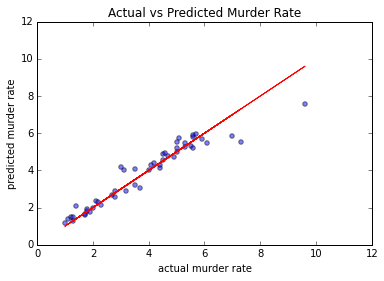

In [28]:
# plot actual vs predicted murder rate
plt.scatter(truth, predicted, alpha=0.5)
plt.xlabel("actual murder rate")
plt.ylabel("predicted murder rate")
plt.title("Actual vs Predicted Murder Rate")
plt.plot(truth, truth, color="red")
plt.show()

In [46]:
predicted = predict_kfold_rand_forest(["no_high_school", "poverty_rate", "incarceration_rate"], df)
print len(predicted)
print predicted

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column

50
[5.1500000000000004, 1.5300000000000002, 5.4299999999999997, 5.1500000000000004, 4.2900000000000009, 2.2399999999999998, 2.7999999999999998, 5.6300000000000008, 4.3499999999999996, 5.5600000000000005, 1.7499999999999996, 5.4700000000000006, 5.5400000000000009, 5.7199999999999998, 1.9600000000000002, 2.4099999999999997, 5.7599999999999998, 5.4000000000000004, 1.53, 3.6100000000000003, 2.4399999999999999, 5.0299999999999994, 2.4100000000000001, 6.8599999999999994, 4.0, 1.8899999999999999, 2.6699999999999999, 5.0099999999999998, 2.0300000000000002, 4.7699999999999996, 3.7700000000000005, 3.6799999999999997, 3.9699999999999998, 1.9599999999999997, 5.3600000000000003, 5.2400000000000002, 2.96, 5.25, 4.2700000000000005, 4.9199999999999999, 2.2800000000000002, 5.0499999999999998, 4.6600000000000001, 1.6100000000000001, 1.7100000000000002, 4.5, 2.6900000000000004, 5.1899999999999995, 1.9600000000000002, 2.7799999999999998]


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


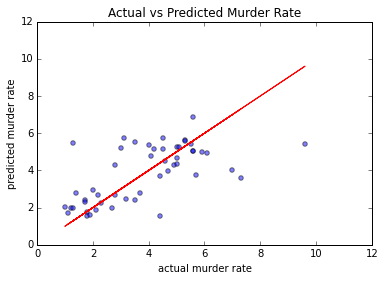

In [47]:
# plot actual vs predicted murder rate
plt.scatter(truth, predicted, alpha=0.5)
plt.xlabel("actual murder rate")
plt.ylabel("predicted murder rate")
plt.title("Actual vs Predicted Murder Rate")
plt.plot(truth, truth, color="red")
plt.show()

In [43]:
predicted = predict_loo_rand_forest(["no_high_school", "poverty_rate", "incarceration_rate"], df)
print len(predicted)
print predicted

/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column

50
[5.1899999999999995, 1.4399999999999999, 5.4199999999999999, 5.2200000000000006, 3.9100000000000001, 2.29, 2.1800000000000002, 4.7900000000000009, 5.6600000000000001, 4.75, 1.73, 5.0700000000000003, 4.54, 5.5, 1.9300000000000002, 2.3399999999999999, 5.4500000000000002, 5.0499999999999998, 2.1599999999999997, 3.71, 2.4500000000000002, 5.5, 2.1200000000000001, 5.9199999999999999, 4.9100000000000001, 1.9000000000000004, 2.4899999999999998, 5.2299999999999995, 1.78, 5.2199999999999998, 5.4300000000000006, 4.25, 4.5999999999999996, 1.7700000000000002, 5.0200000000000005, 4.3100000000000005, 2.7700000000000005, 4.4199999999999999, 4.4400000000000004, 4.6500000000000004, 2.0, 4.4900000000000002, 4.7200000000000006, 1.5700000000000001, 1.6899999999999999, 4.6699999999999999, 3.1100000000000003, 5.2800000000000002, 2.71, 2.6200000000000001]


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:12: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


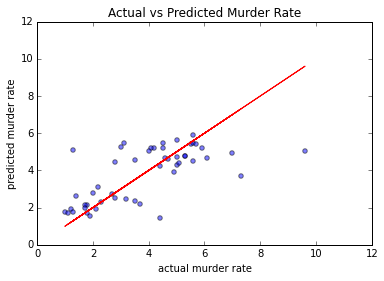

In [44]:
# plot actual vs predicted murder rate
plt.scatter(truth, predicted, alpha=0.5)
plt.xlabel("actual murder rate")
plt.ylabel("predicted murder rate")
plt.title("Actual vs Predicted Murder Rate")
plt.plot(truth, truth, color="red")
plt.show()